# Aim: Assess word frequency changes over time

# Setup

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics.pairwise

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import lib_dataimport
import lib_processing
import importlib
lib_dataimport = importlib.reload(lib_dataimport)
lib_processing = importlib.reload(lib_processing)

In [2]:
df = lib_dataimport.read_data()
words, word_frequencies = lib_processing.bag_of_words(df)

# Find candidates

In [6]:
# We extract word frequency sum, avg, and stddev; and calculate C.V.
word_stats = pd.DataFrame([words, word_frequencies.sum(axis=0), word_frequencies.mean(axis=0), word_frequencies.std(axis=0)]).T
word_stats.columns = ["word", "sum-freq", "mean-freq", "std-freq"]
word_stats["cv-freq"] = word_stats["std-freq"] / word_stats["mean-freq"]

# We only retain words which have been mentioned at least 50 times and sort by C.V.
word_stats = word_stats.loc[word_stats["sum-freq"] > 50, :]
word_stats = word_stats.sort_values(by="cv-freq", ascending=False)

# Print some potentially interesting words
word_stats.head(50)

,word,sum-freq,mean-freq,std-freq,cv-freq
15384,trag,69,0.071651,0.527594,7.363374
7720,handlung,52,0.053998,0.385608,7.141169
6254,frankfurt,51,0.05296,0.373442,7.051467
1863,bed,55,0.057113,0.391841,6.860788
3209,charakter,65,0.067497,0.423373,6.272434
10503,meister,62,0.064382,0.384011,5.964559
5902,faust,55,0.057113,0.331551,5.805156
12303,poesie,62,0.064382,0.370244,5.750718
9898,leser,73,0.075805,0.421965,5.566467
6685,gegenst,70,0.07269,0.403659,5.553194


# Plot frequencies

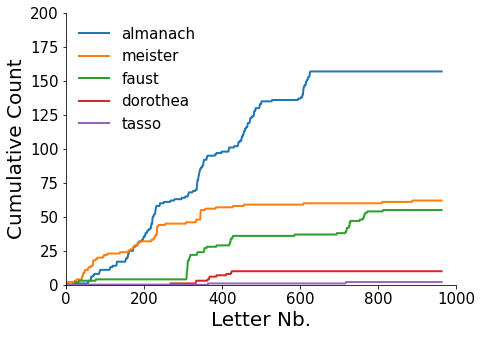

In [74]:
print_words = ["almanach", "meister", "faust", "dorothea", "tasso"]

fig, ax = plt.subplots(1,1,figsize=(7,5))

for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    ax.plot(np.cumsum(freq_over_time), lw=2, label=print_word)
    
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumulative Count", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,1000))
ax.set_ylim((0,200))
ax.legend(loc=2, frameon=False, fontsize=15)

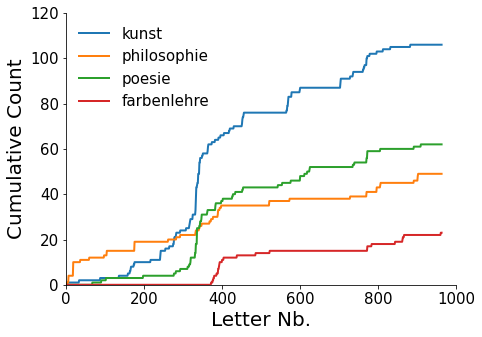

In [73]:
print_words = ["kunst", "philosophie", "poesie", "farbenlehre"]

fig, ax = plt.subplots(1,1,figsize=(7,5))

for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    ax.plot(np.cumsum(freq_over_time), lw=2, label=print_word)
    
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumulative Count", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,1000))
ax.set_ylim((0,120))
ax.legend(loc=2, frameon=False, fontsize=15)

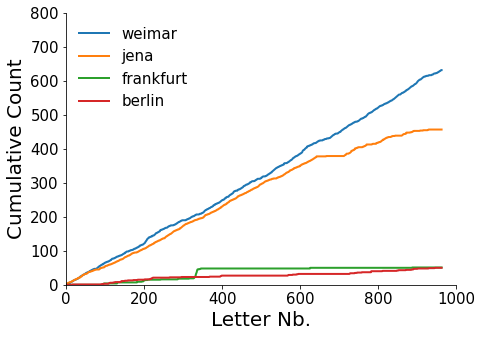

In [42]:
print_words = ["weimar", "jena", "frankfurt", "berlin"]

fig, ax = plt.subplots(1,1,figsize=(7,5))

for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    ax.plot(np.cumsum(freq_over_time), lw=2, label=print_word)
    
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumulative Count", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,1000))
ax.set_ylim((0,800))
ax.legend(loc=2, frameon=False, fontsize=15)

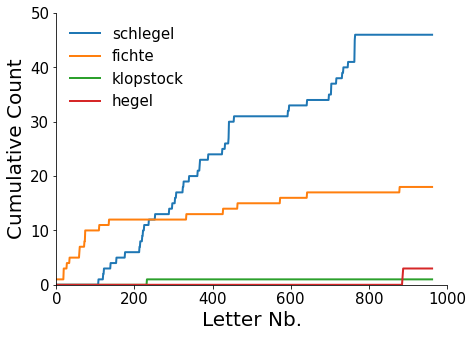

In [77]:
print_words = ["schlegel", "fichte", "klopstock", "hegel"]

fig, ax = plt.subplots(1,1,figsize=(7,5))

for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    ax.plot(np.cumsum(freq_over_time), lw=2, label=print_word)
    
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumulative Count", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,1000))
ax.set_ylim((0,50))
ax.legend(loc=2, frameon=False, fontsize=15)